In [33]:
import pandas as pd
import os
import datetime as dt

from tqdm.notebook import tqdm


import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def generate_weather_ts_fn(country_name):
    dateparse = lambda x: dt.datetime.strptime(x, '%d.%m.%Y %H:%M')

    weather_= pd.read_csv(os.path.join('raw_data', 'weather_data', f'{country_name}'),
                          sep=';', 
                          skiprows=6,
                          date_parser=dateparse,
                          usecols=[0,1],
                          squeeze=True,
                          error_bad_lines=False)
    
    weather_.columns = ['date', 'temp']
    try:
        weather_['date']= pd.to_datetime(weather_['date'], format='%d.%m.%Y %H:%M')
    except:
        weather_= weather_.reset_index()
        weather_= weather_.drop(columns='temp')
        weather_.columns= 'date temp'.split()
    weather_= weather_.rename(columns={'temp':country_name[:-4]})
    weather_= weather_.set_index('date')
    weather_ = weather_.loc[~weather_.index.duplicated(keep='first')]

    return weather_

def generate_weather_ts_for_countries(countries_lst):
    
    weather_series = []
    for c in tqdm(countries_lst):
        c_ts = generate_weather_ts_fn(c)
        weather_series.append(c_ts)
        
    df= pd.concat(weather_series, axis=1)
    df= df.resample('D').mean()
    df.columns = pd.MultiIndex.from_product([['country'],df.columns])

    return df

countries = []

for file in os.listdir(os.path.join('raw_data', 'weather_data')): 
    if file.endswith(".csv"):
        countries.append(file)
        
all_country_weather_df=generate_weather_ts_for_countries(countries)

  0%|          | 0/53 [00:00<?, ?it/s]

In [35]:
all_country_weather_df.head()

country                                                       \
           Netherlands Philippines Singapore       Peru   Denmark     Italy   
date                                                                          
2017-01-01    1.729167   27.250000   27.4125  22.450000  5.645833  5.000000   
2017-01-02    3.208333   27.208333   26.5875  21.314286  0.875000  8.191489   
2017-01-03    5.375000   28.333333   26.3375  21.157143  3.306122  9.791667   
2017-01-04    6.145833   27.750000   26.7500  22.150000  1.958333  5.354167   
2017-01-05    0.708333   26.708333   27.9000  23.025000 -5.729167  5.729167   

                                                      ...                      \
                Chile Lithuania  Slovakia  Indonesia  ...   Iceland   Hungary   
date                                                  ...                       
2017-01-01  25.357143    5.0750 -6.052632  31.444444  ...  0.600000 -6.711538   
2017-01-02  26.285714    1.1375 -4.540000  31.407407  ...  4.148148 -5.560000   
2017-01-03  23.785714   -1.9875  1.160000  30.115385  ...  2.083333 -0.354167   
2017-01-04  23.454545   -2.9125  3.345455  27.448276  ...  2.916667  0.218182   
2017-01-05  26.285714  -13.5375 -1.041667  28.592593  ...  2.562500 -0.788462   

                                                                        \
            Argentina Poland  Bolivia  Guatemala   Honduras     Taiwan   
date                                                                     
2017-01-01  30.304348    NaN   9.2250        NaN  20.842857  22.642857   
2017-01-02  25.375000    NaN   9.7200  22.600000  20.612500  21.422222   
2017-01-03  25.533333    NaN  10.6250  19.533333  19.400000  20.509434   
2017-01-04  26.291667    NaN   8.7375  12.800000  20.325000  23.380952   
2017-01-05  24.826087    NaN   7.7250        NaN  19.950000  22.395833   

                                     
              Estonia CzechRepublic  
date                                 
2017-01-01   3.162500     -6.296296  
2017-01-02  -2.175000     -3.458333  
2017-01-03  -4.279167     -0.321429  
2017-01-04  -8.895833      0.705882  
2017-01-05 -12.326087     -3.437500  

[5 rows x 53 columns]

In [36]:
all_country_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1882 entries, 2017-01-01 to 2022-02-25
Freq: D
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (country, Netherlands)        1880 non-null   float64
 1   (country, Philippines)        1878 non-null   float64
 2   (country, Singapore)          1880 non-null   float64
 3   (country, Peru)               1880 non-null   float64
 4   (country, Denmark)            1880 non-null   float64
 5   (country, Italy)              1880 non-null   float64
 6   (country, Chile)              1825 non-null   float64
 7   (country, Lithuania)          1880 non-null   float64
 8   (country, Slovakia)           1880 non-null   float64
 9   (country, Indonesia)          1706 non-null   float64
 10  (country, Norway)             1880 non-null   float64
 11  (country, Mexico)             1852 non-null   float64
 12  (country, Japan)              1880 n

In [37]:
all_country_weather_df.describe()

country                                                      \
       Netherlands  Philippines    Singapore         Peru      Denmark   
count  1880.000000  1878.000000  1880.000000  1880.000000  1880.000000   
mean     11.182668    28.531080    27.975883    19.603614     9.885226   
std       6.004356     1.513353     1.124094     2.937608     6.505906   
min      -6.375000    24.250000    22.950000    14.766667    -7.395833   
25%       6.520833    27.458333    27.259375    17.014286     4.708333   
50%      10.718750    28.500000    28.025000    19.093750     9.218750   
75%      16.187500    29.515000    28.825000    21.971429    15.544548   
max      29.617021    32.750000    30.650000    27.125000    25.456522   

                                                                        ...  \
             Italy        Chile    Lithuania     Slovakia    Indonesia  ...   
count  1880.000000  1825.000000  1880.000000  1880.000000  1706.000000  ...   
mean     16.393898    18.640683     8.016597    11.581142    28.866514  ...   
std       6.912400     5.783250     8.429712     8.467968     1.450603  ...   
min      -2.063830     4.272727   -19.287500   -10.183673    22.111111  ...   
25%      10.844203    13.666667     1.834375     4.848958    27.969210  ...   
50%      15.473611    19.076923     7.393750    11.187500    29.000000  ...   
75%      22.644444    23.538462    15.131250    19.026042    29.783784  ...   
max      31.617021    30.928571    27.162500    29.734694    35.000000  ...   

                                                                     \
           Iceland      Hungary    Argentina    Poland      Bolivia   
count  1880.000000  1880.000000  1880.000000  1.000000  1867.000000   
mean      5.273985    11.385405    18.536355  5.794118     7.866068   
std       4.855313     8.748020     5.279125       NaN     1.851362   
min      -8.541667   -13.854167     6.000000  5.794118     0.266667   
25%       1.595161     4.324565    14.333333  5.794118     6.675000   
50%       5.449167    11.051250    18.738636  5.794118     7.975000   
75%       9.375000    18.895833    22.722692  5.794118     9.225000   
max      16.583333    29.708333    31.041667  5.794118    13.185714   

                                                                         
         Guatemala     Honduras       Taiwan      Estonia CzechRepublic  
count  1623.000000  1863.000000  1880.000000  1880.000000   1880.000000  
mean     19.962017    21.965685    24.284899     6.963416     10.128844  
std       2.137921     2.311670     5.648186     8.085616      8.007895  
min      10.800000    13.060000     8.000000   -16.129167    -12.470588  
25%      18.700000    20.537500    19.710163     0.989402      3.791667  
50%      20.100000    21.916667    24.370829     5.987500      9.708333  
75%      21.300000    23.100000    29.596809    14.075000     16.718750  
max      27.400000    33.100000    34.176471    27.275000     28.500000  

[8 rows x 53 columns]

## Plot weather data

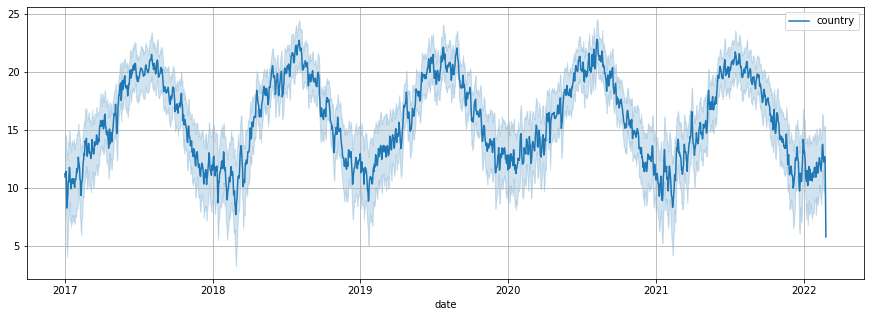

In [38]:
import seaborn as sns

plt.figure(figsize = (15,5))
plt.grid(True)

sns.lineplot(data=all_country_weather_df);

In [39]:
all_country_weather_df.to_csv(os.path.join('generated_data','all_weather.csv'))